In [2]:
import os
import copy
import matplotlib.pyplot as plt
%ls

 Volume in drive G is Google Drive
 Volume Serial Number is 1983-1116

 Directory of g:\My Drive\NYCU\Machine Learning\assignment\HW1

10/12/2021  03:03 PM    <DIR>          .
09/30/2021  02:01 PM    <DIR>          ..
09/23/2021  03:36 PM           261,389 1101ML_HW01.pdf
09/26/2021  05:37 PM            14,120 HW1.ipynb
10/12/2021  03:03 PM            18,165 HW1_310551154_???.ipynb
09/30/2021  02:20 PM            10,492 HW1_310551154_???.py
09/26/2021  01:50 PM               860 testfile.txt
               5 File(s)        305,026 bytes
               2 Dir(s)   8,964,296,704 bytes free


In [3]:
with open("testfile.txt","r") as F:
    inputdata = F.readlines()
#print(inputdata)

def string2matrix(input):
    X = []
    Y = []
    matrix = []
    for i in range(len(input)):
        row = input[i].split(",")     
        row[0] = float(row[0])
        X.append(float(row[0]))
        row[1] = float(row[1])
        Y.append(float(row[1]))
        matrix.append(row)
    return X, Y, matrix

In [4]:
class matrix(): 
    def __init__(self,element):
        self.data = element
        self.shape = matrix.shape(self)
        self.rows = self.shape[0]
        self.columns = self.shape[1]
        self.trace = matrix.trace(self)
          
    def shape(self):
        rows = len(self.data)
        columns = len(self.data[0])
        return [rows,columns]
    
    def issquare(self):
        return self.rows == self.columns
    
    def det(self):
        if(not self.issquare()):
            return ValueError('matrix is not square')
        else:
            pass
    
    def trace(self):
        if(not self.issquare()):
            return ValueError('matrix is not square')
        trace = 0
        for i in range(self.rows):
            trace += self.data[i][i]
        return trace
    
    def scalars(self,scalar):
        for i in range(self.rows):
            self.data[i] = [ x*scalar for x in self.data[i]]
        return self
                            
    def gssjrdn(self,change=False):
        if change:
            temp = matrix(self.data)
        else:
            temp = copy.deepcopy(self)
            
        n = min(temp.rows,temp.columns) # n is max diagonal element
        for i in range(n):
            array = []
            for j in range(i,n):
                array.append(temp.T().data[i][j])
            max_value = max(array)
            pivot =  temp.T().data[i].index(max_value)
            if max_value == 0:
                continue
            temp.row_swap(i,pivot)
            temp.row_scalar(i,1/max_value)
#             print(temp.data)
#             print("--------------------")
            for j in range(i+1,n):
                if temp.data[j][i] != 0:
                    temp.row_add(i,j,-temp.data[j][i])
#                     print(temp.data)
#                     print("--------------------")
            
            #backpropagation
        for i in range(n-1,-1,-1):
            if temp.data[i][i] == 0:
                break
            for j in range(i-1,-1,-1):
                if temp.data[j][i] != 0:
                    temp.row_add(i,j,-temp.data[j][i])
#                     print(temp.data)
#                     print("--------------------")
        
        for i in range(n):
            if temp.data[i][i] == 0:
                for j in range(i+1,n):
                    if temp.data[j][j] == 1:
                        temp.row_swap(i,j)
                        break
#                     print(temp.data)
#                     print("--------------------")
        
        return temp
        
    
    def row_add(self,i,j,k): #row[j] += row[i]*k
        self.data[j] = [ a*k + b for a,b in zip(self.data[i],self.data[j])]
    
    def row_scalar(self,i,k): #row[i] * k
        self.data[i] = [ x*k for x in self.data[i]] 
        
    def row_swap(self,i,j): #swap row[i] and row[j]
        temp =self.data[i] 
        self.data[i] = self.data[j] 
        self.data[j] = temp
    
    
    def rank(self):
        rank=0
        n = min(self.rows,self.columns) # n is max diagonal element
        temp = self.gssjrdn(change=False)
        #print(temp.data)
        for i in range(n):
            if round(temp.data[i][i]) == 1:
                rank += 1
        return rank
    
    def inverse(self,change=False):
        if(not self.issquare()):
            raise ValueError('matrix is not square')
        if self.rank() != self.rows:
            raise ValueError('matrix inverse not exist')
        if change:
            temp = matrix(self.data)
        else:
            temp = copy.deepcopy(self)
            
        I = Identity(temp.rows)
        
        n = temp.rows
        
        for i in range(n): # [A|I] -> A^-1[A|I] -> [I|A^-1]
            array = []
            for j in range(i,n):
                array.append(temp.T().data[i][j])
            max_value = max(array)
            pivot =  temp.T().data[i].index(max_value)
            if max_value == 0:
                continue

            temp.row_swap(i,pivot)
            temp.row_scalar(i,1/max_value)
            
            #------------------------------
            I.row_swap(i,pivot)
            I.row_scalar(i,1/max_value)
            for j in range(i+1,n):
                if temp.data[j][i] != 0:
                    k = -temp.data[j][i]
                    temp.row_add(i,j,k)
                    I.row_add(i,j,k)
            
            #backpropagation
        for i in range(n-1,-1,-1):
            if temp.data[i][i] == 0:
                break
            for j in range(i-1,-1,-1):
                if temp.data[j][i] != 0:
                    k = -temp.data[j][i]
                    temp.row_add(i,j,k)
                    I.row_add(i,j,k)

        return I
        
    
    def T(self):
        transpose = []
        for i in range(self.columns):
            row = []
            for j in range(self.rows):
                row.append(self.data[j][i])
            transpose.append(row)
        return matrix(transpose)
    
    def __neg__(self):
        C = []
        for i in range(self.rows):
            row = []
            for j in range(self.columns):
                element = -1*self.data[i][j]
                row.append(element)
            C.append(row)
        return matrix(C)        
    
    def __add__(self,other):
        if self.shape != other.shape:
            raise ValueError(f'A and B is not match, A is {self.shape}, B is {other.shape}. ')
        else:
            C = []
            for i in range(self.rows):
                row = []
                for j in range(other.columns):
                    element = self.data[i][j] + other.data[i][j]
                    row.append(element)
                C.append(row)
            return matrix(C)
        
    def __sub__(self,other):
        if self.shape != other.shape:
            raise ValueError(f'A and B is not match, A is {self.shape}, B is {other.shape}. ')
        else:
            C = []
            for i in range(self.rows):
                row = []
                for j in range(other.columns):
                    element = self.data[i][j] - other.data[i][j]
                    row.append(element)
                C.append(row)
            return matrix(C)
    
    
    def __mul__(self,other):
        if self.columns != other.rows:
            raise ValueError(f'A and B is not match, A is {self.shape}, B is {other.shape}. ')
        else:
            C = []
            for i in range(self.rows):
                row = []
                for j in range(other.columns):
                    element = 0
                    for k in range(self.columns): # or B.rows
                        element += self.data[i][k] * other.data[k][j]
                    row.append(element)
                C.append(row)
            return matrix(C)
        
def Identity(n):
    identity = []
    for i in range(n):
        row = []
        for j in range(n):
            row.append(1) if i==j else row.append(0)
        identity.append(row)
    return matrix(identity)

def making_matrix(n,X):
    matrix_A = []
    for i in range(len(X)):
        row = []
        for j in range(n):
            row.append(X[i]**j)
        matrix_A.append(row)
    return matrix(matrix_A)


In [5]:

def visualization(line_coe,X,B):
    
    x = []
    start = -5.0
    end = 5.0
    while round(start,2)!=end:
        x.append(start)
        start += 0.1
        
    Y=[]
    for i in range(len(x)):
        y = 0
        for j in range(len(line_coe)):
            #print(line_coe[j][0],X[i])
            y += (line_coe[j][0]*(x[i]**j))
        Y.append(y)
    
    
    
    plt.plot(X,B.data,'o',color='red')
    plt.plot(x,Y)
    plt.show()

def LSE(n,Lambda=0):
    X, B, _  = string2matrix(inputdata)
    B = matrix([B])
    
    B = B.T()
    A = making_matrix(n,X)
    
    I = Identity(n)
    I.scalars(Lambda)
    line_coe = ((((A.T()*A+I).inverse())*A.T())*B).data # x^0 , x^1 , x^2 , ......
    
    string = ""
    for i in range(len(line_coe)-1,-1,-1):
        if len(string):
            string+=" + "
        string += str(line_coe[i][0])+"X^"+str(i)
        
    Total_error = 0    
    for i in range(len(X)):
        y = 0
        for j in range(len(line_coe)):
            #print(line_coe[j][0],X[i])
            y += (line_coe[j][0]*(X[i]**j))
        Total_error += (B.data[i][0] - y)**2
        
    print(f"LSE: n={n} , lambda={Lambda}")
    print(f"Fitting line: {string}")
    print(f"Total error: {Total_error}")
    
    # visualization
    visualization(line_coe,X,B)
    
def newton(n):                            #Xn+1 = Xn - Hf(x)^-1 * deltaf(Xn)
    X, B, _  = string2matrix(inputdata)   # Hf(X) = 2A^t * A %deltaf(x) = 2A^t*Ax - 2A^t*b
    B = matrix([B])
    B = B.T()
    A = making_matrix(n,X)
    X0 = [1 for i in range(n)] #set initial X0 to 0 vector
    X0 = matrix([X0]).T()

    Xn = X0
    error = 99999

    while error > 1e-4:

        Xn_1 = Xn - ((((A.T()*A).scalars(2)).inverse()) * (((A.T()*A) * Xn).scalars(2) - (A.T() * B).scalars(2)) )

        temp = 0
        for i in range(Xn_1.rows):
            temp += (Xn_1.data[i][0] - Xn.data[i][0])**2

        error = temp / n

        Xn = Xn_1
    
    string = ""
    for i in range(len(Xn.data)-1,-1,-1):
        if len(string):
            string+=" + "
        string += str(Xn.data[i][0])+"X^"+str(i)
        
    Total_error = 0    
    for i in range(len(X)):
        y = 0
        for j in range(len(Xn.data)):
            y += (Xn.data[j][0]*(X[i]**j))
        Total_error += (B.data[i][0] - y)**2
        
    print(f"Newton's method : n={n}")
    print(f"Fitting line: {string}")
    print(f"Total error: {Total_error}")
    visualization(Xn_1.data,X,B)

LSE: n=2 , lambda=0
Fitting line: 4.432950310076807X^1 + 29.30640470605626X^0
Total error: 16335.123164957964


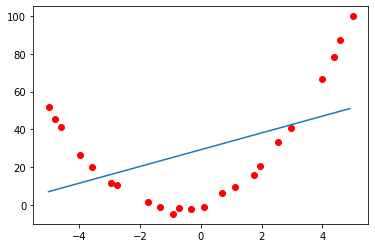

Newton's method : n=2
Fitting line: 4.432950310076807X^1 + 29.306404706056256X^0
Total error: 16335.123164957964


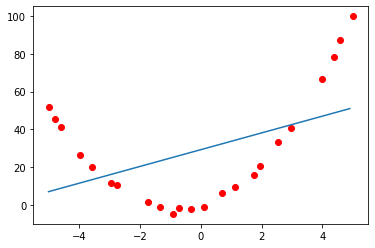

LSE: n=3 , lambda=0
Fitting line: 3.0238533934865712X^2 + 4.906190263863797X^1 + -0.23140175608771862X^0
Total error: 26.559959499333075


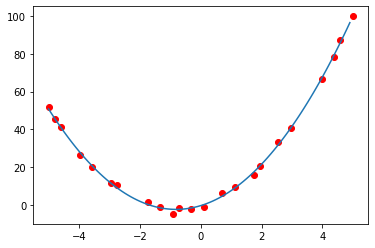

Newton's method : n=3
Fitting line: 3.023853393486571X^2 + 4.9061902638638X^1 + -0.23140175608771835X^0
Total error: 26.559959499333065


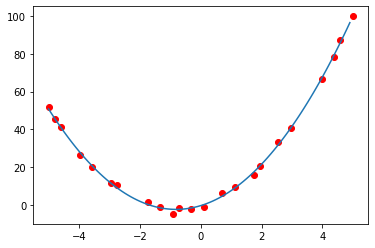

LSE: n=3 , lambda=10000
Fitting line: 0.834533282700286X^2 + 0.09314819831918814X^1 + 0.046950699273469274X^0
Total error: 22649.738493024146


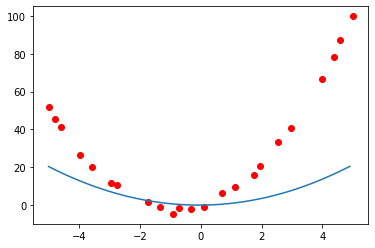

Newton's method : n=3
Fitting line: 3.023853393486571X^2 + 4.9061902638638X^1 + -0.23140175608771835X^0
Total error: 26.559959499333065


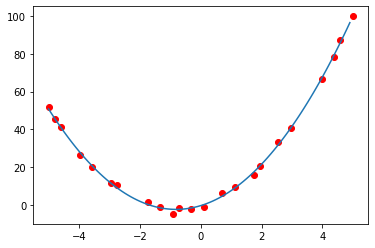

In [6]:
A = matrix([[0,2,4],[2,4,2],[3,3,1]])
# B = matrix([[0,0,1],[0,1,0],[0,0,0]]).
C = matrix([[4, 2, 6], [2, 6, 8], [6, 8, 18]])

LSE(2,0)
newton(2)


LSE(3,0)
newton(3)


LSE(3,10000)
newton(3)